<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Blending submissions of 3.695, 96, 97 & 98

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 4
%autosave 120

Autosaving every 120 seconds


In [2]:
from fastai.io import *
from fastai.structured import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from pandas_summary import DataFrameSummary
from IPython.display import display
from sklearn import metrics
import feather
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, RepeatedKFold
from sklearn.metrics import mean_squared_error
import warnings

In [4]:
PATH = 'submissions/'

In [42]:
files = ['submission-2019-01-16 00:35:46.490517.csv','submission-2019-01-18 01:18:08.182115.csv','submission-2019-01-20 17:01:54.207459.csv','submission-2019-01-16 00:36:26.004443.csv','submission-2019-01-18 01:42:20.587834.csv','submission-2019-01-20 17:27:46.797180.csv','submission-2019-01-16 12:20:00.957329.csv','submission-2019-01-18 01:47:04.024727.csv','submission-2019-01-20 18:29:37.773532.csv','submission-2019-01-16 21:37:16.421927.csv','submission-2019-01-18 17:22:46.188675.csv','submission-2019-01-20 19:11:58.593189.csv','submission-2019-01-17 10:20:06.724992.csv','submission-2019-01-20 01:28:12.077657.csv','submission-2019-01-20 19:35:24.892043.csv','submission-2019-01-17 11:09:17.495216.csv','submission-2019-01-20 01:46:39.187580.csv','submission-2019-01-20 20:47:32.743729.csv','submission-2019-01-17 23:23:57.743505.csv','submission-2019-01-20 02:32:16.439302.csv']

In [43]:
files = files[:15]

In [71]:
targets = []

In [72]:
for (i,c) in enumerate(files):
    targets.append(pd.read_csv(f'{PATH}{c}', names=["card_id",f'target_{i}'],skiprows=[0],header=None))

In [73]:
targets[1].head()

,card_id,target_1
0,C_ID_0ab67a22ab,-3.019595
1,C_ID_130fd0cbdd,-0.300121
2,C_ID_b709037bc5,-0.945018
3,C_ID_d27d835a9f,-0.102299
4,C_ID_2b5e3df5c2,-1.219206


In [74]:
files

['submission-2019-01-16 00:35:46.490517.csv',
 'submission-2019-01-18 01:18:08.182115.csv',
 'submission-2019-01-20 17:01:54.207459.csv',
 'submission-2019-01-16 00:36:26.004443.csv',
 'submission-2019-01-18 01:42:20.587834.csv',
 'submission-2019-01-20 17:27:46.797180.csv',
 'submission-2019-01-16 12:20:00.957329.csv',
 'submission-2019-01-18 01:47:04.024727.csv',
 'submission-2019-01-20 18:29:37.773532.csv',
 'submission-2019-01-16 21:37:16.421927.csv',
 'submission-2019-01-18 17:22:46.188675.csv',
 'submission-2019-01-20 19:11:58.593189.csv',
 'submission-2019-01-17 10:20:06.724992.csv',
 'submission-2019-01-20 01:28:12.077657.csv',
 'submission-2019-01-20 19:35:24.892043.csv']

In [75]:
files[-1:]

['submission-2019-01-20 19:35:24.892043.csv']

In [76]:
targets[-1]

,card_id,target_14
0,C_ID_0ab67a22ab,-2.849413
1,C_ID_130fd0cbdd,-0.318607
2,C_ID_b709037bc5,-0.943884
3,C_ID_d27d835a9f,-0.149426
4,C_ID_2b5e3df5c2,-1.268246
5,C_ID_5814b4f13c,0.161805
6,C_ID_a1b3c75277,-0.016550
7,C_ID_f7cada36d3,0.389783
8,C_ID_9d2bc8dfc4,-0.751201
9,C_ID_6d8dba8475,-1.016441


In [77]:
pd.read_csv(f'submission-2019-01-20 19:35:24.892043.csv', names=["card_id",f'target_1'],skiprows=[0],header=None)

,card_id,target_1
0,C_ID_0ab67a22ab,-2.849413
1,C_ID_130fd0cbdd,-0.318607
2,C_ID_b709037bc5,-0.943884
3,C_ID_d27d835a9f,-0.149426
4,C_ID_2b5e3df5c2,-1.268246
5,C_ID_5814b4f13c,0.161805
6,C_ID_a1b3c75277,-0.016550
7,C_ID_f7cada36d3,0.389783
8,C_ID_9d2bc8dfc4,-0.751201
9,C_ID_6d8dba8475,-1.016441


In [78]:
df_base = targets[-1]

In [79]:
df_base.head()

,card_id,target_14
0,C_ID_0ab67a22ab,-2.849413
1,C_ID_130fd0cbdd,-0.318607
2,C_ID_b709037bc5,-0.943884
3,C_ID_d27d835a9f,-0.149426
4,C_ID_2b5e3df5c2,-1.268246


In [80]:
files[:14]

['submission-2019-01-16 00:35:46.490517.csv',
 'submission-2019-01-18 01:18:08.182115.csv',
 'submission-2019-01-20 17:01:54.207459.csv',
 'submission-2019-01-16 00:36:26.004443.csv',
 'submission-2019-01-18 01:42:20.587834.csv',
 'submission-2019-01-20 17:27:46.797180.csv',
 'submission-2019-01-16 12:20:00.957329.csv',
 'submission-2019-01-18 01:47:04.024727.csv',
 'submission-2019-01-20 18:29:37.773532.csv',
 'submission-2019-01-16 21:37:16.421927.csv',
 'submission-2019-01-18 17:22:46.188675.csv',
 'submission-2019-01-20 19:11:58.593189.csv',
 'submission-2019-01-17 10:20:06.724992.csv',
 'submission-2019-01-20 01:28:12.077657.csv']

In [81]:
for t in targets[:14]:
    df_base = pd.merge(df_base, t, how='inner', on='card_id')

In [82]:
df_base.head()

,card_id,target_14,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,target_10,target_11,target_12,target_13
0,C_ID_0ab67a22ab,-2.849413,-2.869605,-3.019595,-2.769621,-2.869605,-2.826457,-2.773222,-2.901473,-2.619985,-2.783666,-3.116562,-2.544486,-2.914439,-3.230264,-2.525418
1,C_ID_130fd0cbdd,-0.318607,-0.315108,-0.300121,-0.267799,-0.315108,-0.320021,-0.273974,-0.269904,-0.318855,-0.304541,-0.323384,-0.403013,-0.289451,-0.310872,-0.320576
2,C_ID_b709037bc5,-0.943884,-1.100528,-0.945018,-0.997711,-1.100528,-1.035092,-1.045871,-1.324754,-0.923047,-1.057747,-1.258687,-1.082348,-0.902426,-1.247498,-0.900888
3,C_ID_d27d835a9f,-0.149426,-0.167800,-0.102299,-0.081918,-0.167800,-0.091458,-0.075512,-0.158622,-0.117265,-0.103267,-0.172673,-0.103834,-0.178752,-0.170770,-0.146262
4,C_ID_2b5e3df5c2,-1.268246,-1.329265,-1.219206,-1.232267,-1.329265,-1.214999,-1.215310,-1.272019,-1.229322,-1.242367,-1.240200,-1.273662,-1.234052,-1.163019,-1.269583


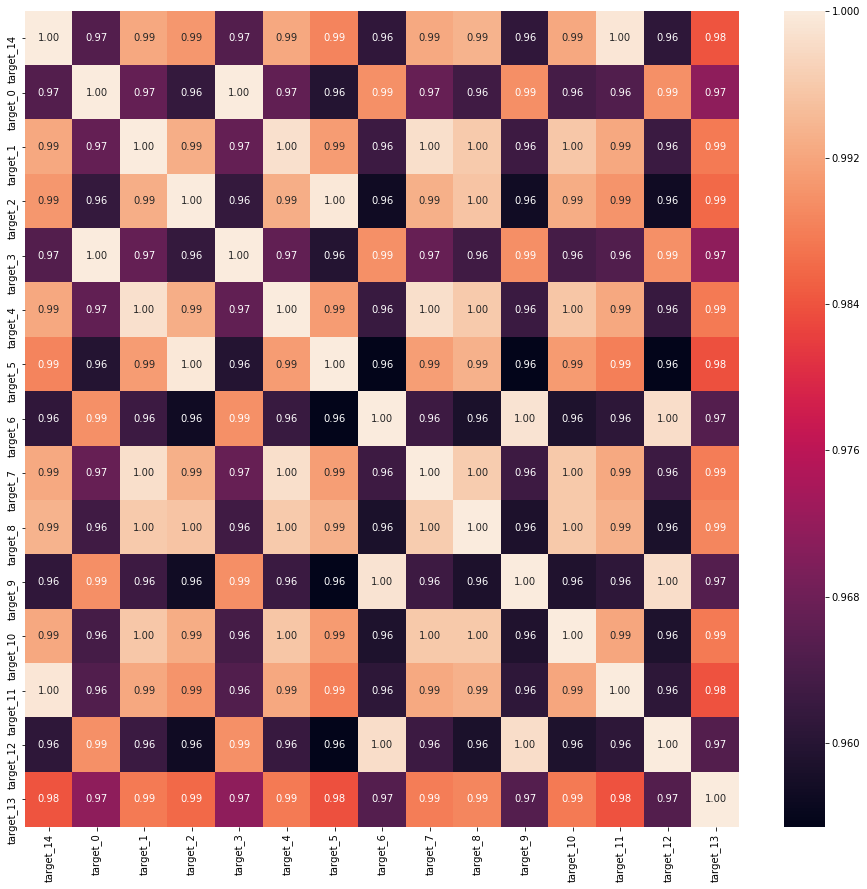

In [85]:
plt.figure(figsize=(16,15))
sns.heatmap(df_base.iloc[:,1:].corr(),annot=True,fmt=".2f")

In [87]:
M = np.zeros([df_base.iloc[:,1:].shape[1],df_base.iloc[:,1:].shape[1]])
for i in np.arange(M.shape[1]):
    for j in np.arange(M.shape[1]):
        M[i,j] = np.sqrt(metrics.mean_squared_error(df_base.iloc[:,i+1], df_base.iloc[:,j+1]))


In [88]:
M

array([[0.     , 0.31891, 0.15163, 0.1677 , 0.31891, 0.15174, 0.18447, 0.33688, 0.15109, 0.13882, 0.33624,
        0.15424, 0.0507 , 0.33733, 0.21872],
       [0.31891, 0.     , 0.30294, 0.33491, 0.     , 0.30451, 0.34258, 0.16581, 0.30143, 0.3222 , 0.16665,
        0.31699, 0.31322, 0.1654 , 0.27948],
       [0.15163, 0.30294, 0.     , 0.1458 , 0.30294, 0.06069, 0.16479, 0.3223 , 0.06378, 0.10499, 0.32188,
        0.11041, 0.14787, 0.32312, 0.18666],
       [0.1677 , 0.33491, 0.1458 , 0.     , 0.33491, 0.14566, 0.03784, 0.35313, 0.14462, 0.11936, 0.35251,
        0.14905, 0.17142, 0.35319, 0.20677],
       [0.31891, 0.     , 0.30294, 0.33491, 0.     , 0.30451, 0.34258, 0.16581, 0.30143, 0.3222 , 0.16665,
        0.31699, 0.31322, 0.1654 , 0.27948],
       [0.15174, 0.30451, 0.06069, 0.14566, 0.30451, 0.     , 0.16462, 0.32403, 0.06457, 0.10527, 0.32373,
        0.11188, 0.14869, 0.32485, 0.18753],
       [0.18447, 0.34258, 0.16479, 0.03784, 0.34258, 0.16462, 0.     , 0.36025, 0.16354,

In [89]:
df_base['target'] = df_base.iloc[:,1:].mean(axis=1)
df_base[['card_id','target']].to_csv("chandu_mean1.csv",index=False)

In [90]:
!ls

'Blending submissions.ipynb'
'Elo - ML model - 3.695 beta.ipynb'
'Elo - ML model - 3.695.ipynb'
'Elo - ML model - 3.696.ipynb'
'Elo - ML model - cat aggregates.ipynb'
'Elo - ML model clean.ipynb'
'Elo - ML model proc_df.ipynb'
'Elo - ML model-RF copy.ipynb'
'Elo - ML model-backup.ipynb'
'Elo - ML model-new.ipynb'
'Elo RF- New.ipynb'
'Elo RF.ipynb'
'Elo end 2 end.ipynb'
'Elo feature engineering - 3.696.ipynb'
'Elo feature engineering 3.695 beta.ipynb'
'Elo feature engineering 3.695.ipynb'
'Elo feature engineering using agg.ipynb'
'Elo feature engineering-backup.ipynb'
'Elo feature engineering-proc_df - new-Copy1.ipynb'
'Elo feature engineering-proc_df - new.ipynb'
'Elo feature engineering-proc_df-OLD.ipynb'
'Elo feature engineering-proc_df.ipynb'
'Elo merchant category reco - using RF.ipynb'
 README.md
'Scrap pad.ipynb'
'Scrap pad.py'
'TS Fresh.ipynb'
'TS Fresh.py'
'Train & test clean.ipynb'
'Using DL.ipynb'
'Using Feature tools.ipynb'
 adf
 authorised_trans_proc_agg
 chandu_mean1.csv
 

In [91]:
FileLink('./chandu_mean1.csv')

/home/chandrasekhar/private/kaggle/chandu_mean1.csv

chandu_mean1.csv - 3.694 on LB